In [15]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### GRADED 
Use global and groupby aggregates to answer the following questions

    - What is the average tip amount 
    - What is the average bill amount 
    - What is the average tip by gender 
    - What is the average tip on a sunday by gender 
    - Which party size gives the maximum tip as a percent of total bill amount 

In [85]:
# What is the average tip amount
avg_tip = tips['tip'].mean()
print("The average tip amount: $%.2f" % avg_tip)

# What is the average bill amount 
print("\n")
avg_bill = tips['total_bill'].mean()
print("The average bill amount: $%.2f" % avg_bill)

# What is the average tip by gender
print("\n")
avg_tip_gender = tips.groupby('sex').mean()['tip']
print("The average tip by gender:")
print("Male: %.2f" % avg_tip_gender[0],'\n'"Female: %.2f" % avg_tip_gender[1])

# What is the average tip on a sunday by gender
print("\n")
group_sunday_gender = tips[tips["day"] == "Sun"].groupby("sex").mean()["tip"]
print("The average tip on a sunday by gender:")
print("Male: {0:.2f}" "\n" "Female: {1:.2f}".format(group_sunday_gender[0], group_sunday_gender[1]))

# Which party size gives the maximum tip as a percent of total bill amount
print("\n")
tips["percent of total bill"] = tips["tip"] / tips["total_bill"]
max_tip = tips.iloc[tips["percent of total bill"].idxmax()]
print('Party size that gives the maximum tip as a percent of total bill amount:', max_tip["size"])

The average tip amount: $3.00


The average bill amount: $19.79


The average tip by gender:
Male: 3.09 
Female: 2.83


The average tip on a sunday by gender:
Male: 3.22
Female: 3.37


Party size that gives the maximum tip as a percent of total bill amount: 2


### GRADED
    - Generate a scatter plot of tip amount (y-axis) and total_bill (x-axis)
    - Generate the plots using matplotlib, bokeh and seaborn


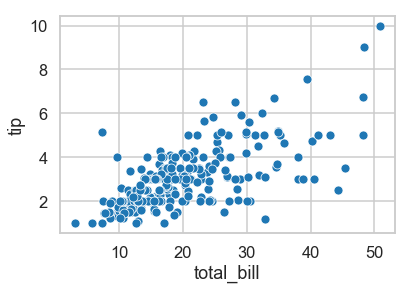

In [117]:
# seaborn
sns.set_style('whitegrid')
sns.set_context('talk')

sns.scatterplot(tips["total_bill"],tips["tip"])

Text(0,0.5,'tip')

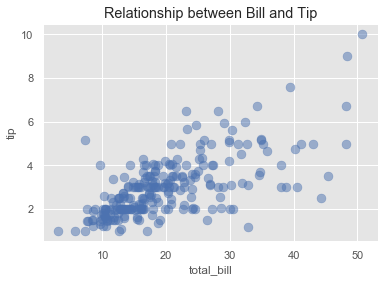

In [157]:
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

plt.scatter(tips["total_bill"], tips["tip"], c ="b", alpha= .5, s = 80)
plt.title("Relationship between Bill and Tip")
plt.xlabel("total_bill")
plt.ylabel("tip")

In [64]:
# bokeh
from bokeh.plotting import figure, output_file, show

p = figure(plot_width=400, plot_height=400)
p.circle(tips["total_bill"], tips["tip"], size=10, color="navy", alpha=0.5)

p.add_layout(Title(text="Total Bill", align="center"), "below")
p.add_layout(Title(text="Tip Amount", align="center"), "left")

show(p)

### GRADED
    - Generate a box plot that shows average bill amount by day of week
    - Generate a box plot that shows average bill amount by gender
    - Show the above two plots side by side
    - Generate the same plots using matplotlib and bokeh

#### Seaborn - Generate a box plot that shows average bill amount by day of week


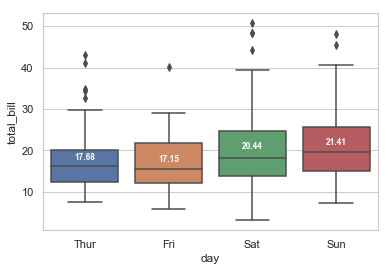

In [161]:
import numpy as np
sns.set(style="whitegrid")

plot = sns.boxplot(x="day", y="total_bill", data=tips)

day_mean = tips.groupby('day').mean()['total_bill'].values
mean_labels = [str(np.round(s,2)) for s in day_mean]

pos = range(len(day_mean))
for tick,label in zip(pos, plot.get_xticklabels()):
    plot.text(pos[tick], day_mean[tick]+0.03, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

#### Seaborn - Generate a box plot that shows average bill amount by gender

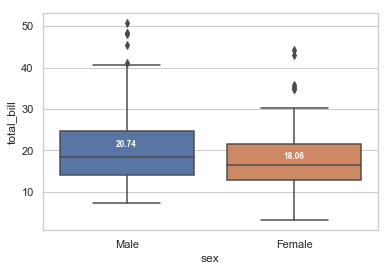

In [162]:
plot = sns.boxplot(x="sex", y="total_bill",data=tips)

day_mean = tips.groupby(['sex']).mean()['total_bill'].values
mean_labels = [str(np.round(s, 2)) for s in day_mean]

pos = range(len(day_mean))
for tick,label in zip(pos,plot.get_xticklabels()):
    plot.text(pos[tick], day_mean[tick] + 0.03, mean_labels[tick], 
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

#### Plots side by side

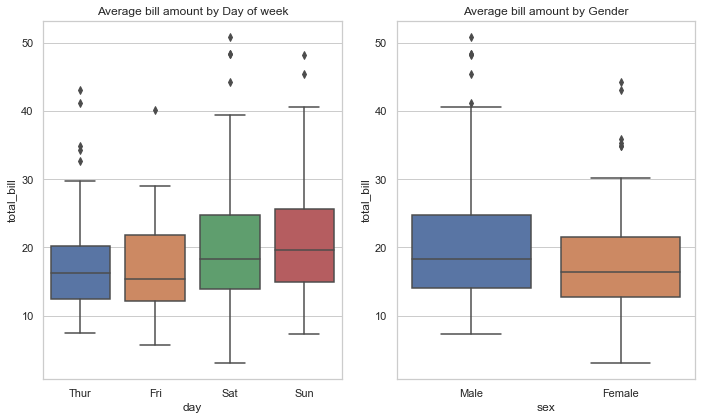

In [163]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.boxplot(x="day", y='total_bill', data = tips)
plt.title('Average bill amount by Day of week')

plt.subplot(1,2,2)
sns.boxplot(x="sex", y='total_bill', data = tips)
plt.title('Average bill amount by Gender')

plt.tight_layout()

#### Matplotlib - Generate a box plot that shows average bill amount by day of week

[Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

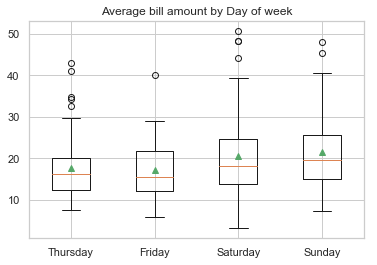

In [164]:
Thursday = tips[tips['day'] == 'Thur']
Friday = tips[tips['day'] == 'Fri']
Saturday = tips[tips['day'] == 'Sat']
Sunday = tips[tips['day'] == 'Sun']

plt.boxplot([Thursday['total_bill'], Friday['total_bill'], Saturday['total_bill'], Sunday['total_bill']], showmeans=True)
plt.title('Average bill amount by Day of week')
plt.gca().set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'])

#### Matplotlib - Generate a box plot that shows average bill amount by gender

[Text(0,0,'Male'), Text(0,0,'Female')]

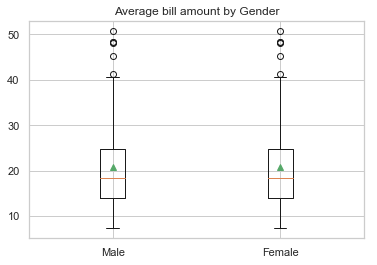

In [165]:
Male = tips[tips['sex'] == 'Male']
Female = tips[tips['sex'] == 'Male']

plt.boxplot([Male['total_bill'], Female['total_bill']], showmeans=True)
plt.title('Average bill amount by Gender')
plt.gca().set_xticklabels(['Male', 'Female'])

#### Plots side by side

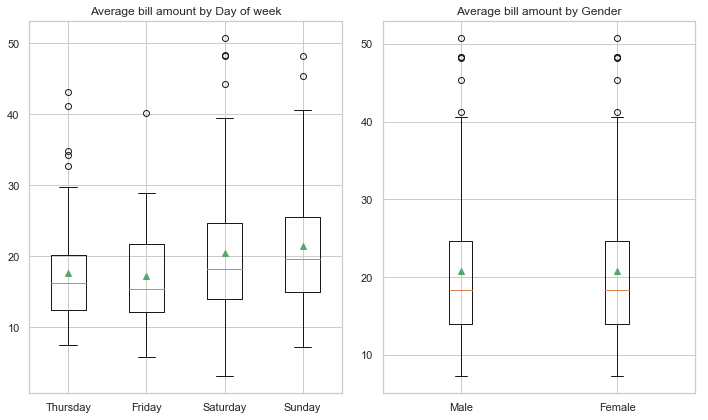

In [166]:
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.boxplot([Thur['total_bill'], Fri['total_bill'], Sat['total_bill'], Sun['total_bill']], showmeans=True)
plt.title('Average bill amount by Day of week')
plt.gca().set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.subplot(1,2,2)
plt.boxplot([Male['total_bill'], Female['total_bill']], showmeans=True)
plt.title('Average bill amount by Gender')
plt.gca().set_xticklabels(['Male', 'Female'])

plt.tight_layout()

#### Bokeh - Generate a box plot that shows average bill amount by day of week

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
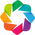

:BoxWhisker   [day]   (total_bill)

In [153]:
import holoviews as hv
hv.extension('bokeh')

boxwhisker_Week = hv.BoxWhisker(tips, 'day','total_bill', label="Bill amount by Weeks")
boxwhisker_Week.options(show_legend=False, width=350)

#### Bokeh - Generate a box plot that shows average bill amount by gender

In [152]:
boxwhisker_Gender = hv.BoxWhisker(tips,'sex','total_bill',label="Bill amount by Gender")
boxwhisker_Gender.options(show_legend=False, width=350)

:BoxWhisker   [sex]   (total_bill)

#### Plots side by side

In [145]:
bokeh_plot = hv.Layout(boxwhisker_Week + boxwhisker_Gender)
bokeh_plot

:Layout
   .BoxWhisker.Bill_amount_by_Weeks  :BoxWhisker   [day]   (total_bill)
   .BoxWhisker.Bill_amount_by_Gender :BoxWhisker   [sex]   (total_bill)

### GRADED
    - Using seaborn lmplot(), examine the linear relationship between tips and total_bill across different dimensions to answer the following
    - Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)
    - Are tips larger during lunch or dinner (as a percentage of total_bill)
    - Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?
        - Answer the question by visual examination of lmplot output

#### Do smoker/non-smoker give a higher tip as a percentage of total_bill (which line has a steeper slope)

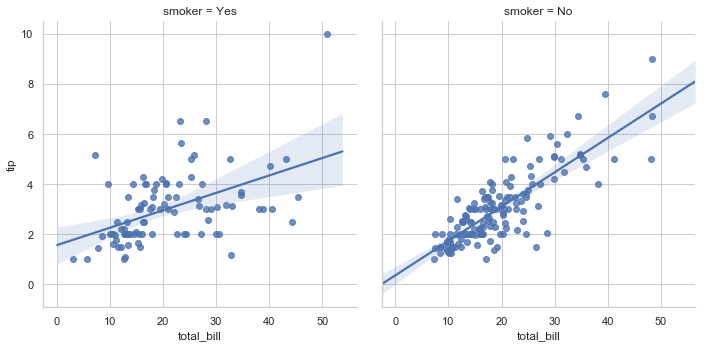

In [167]:
sns.lmplot(x= "total_bill", y="tip", data=tips, col="smoker")

We can see that Non-smokers tend to give higher tip in this dataset based on the slop is steeper.

#### Are tips larger during lunch or dinner (as a percentage of total_bill)

In [182]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent of total bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


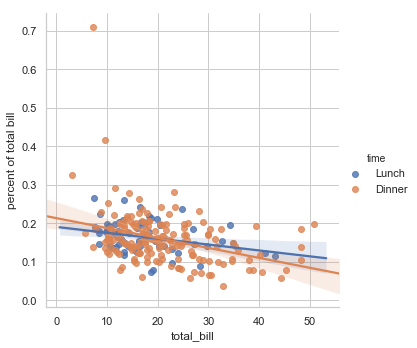

In [189]:
sns.lmplot(x= "total_bill", y="percent of total bill", data=tips, hue= "time")

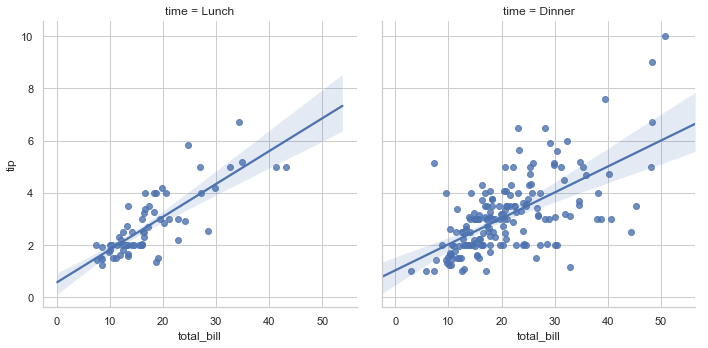

In [181]:
sns.lmplot(x= "total_bill", y="tip", data=tips, col="time")

Based on the plots, I observed that tip is given more during the lunch time than dinner time since the slop is slightly steeper.

#### Does the gender that tips the most (as a percentage of total_bill) change between lunch and dinner?


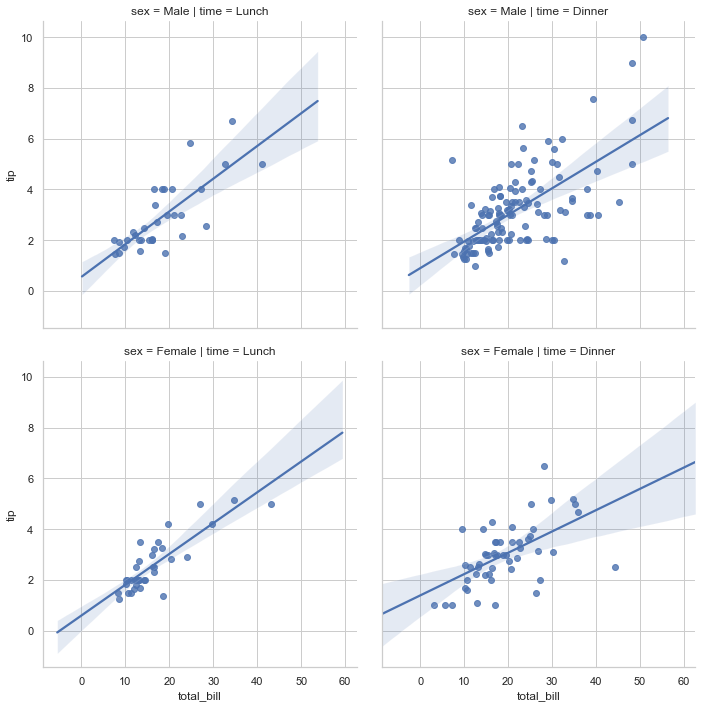

In [180]:
sns.lmplot(x= "total_bill", y="tip", data=tips, col="time", row="sex")

By observing the plots above, we can see that when gender is **male**, people tend to pay more tip for lunch. **Female** have the similar pattern as well.